In [11]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l
# 造出来有噪声的数据
def synthetic_data(w,b,num_examples):
    # 生成 y = Xw + b + 噪声
    X = torch.normal(0,1,(num_examples,len(w))) # 生成均值为0，方差为1的随机数，有num_examples个样本，有len(w)个特征
    y = torch.matmul(X,w) + b # torch.matmul(X,w)就是矩阵乘向量
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2.,-3.,4.])
ture_b = 4.2
features,labels = synthetic_data(true_w,ture_b,1000)

In [12]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([ 1.7177, -0.5739,  0.1786]) 
label: tensor([10.0593])


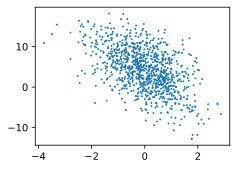

In [15]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1);

In [19]:
#读懂下一个cell代码所需要的前置知识
tmp = list(range(0, 10, 2))
print(tmp) # 三个参数的range
random.shuffle(tmp)# 洗牌算法
print(tmp)

# todo yield关键字的理解


[0, 2, 4, 6, 8]
[6, 0, 2, 8, 4]


In [16]:
# 每次从样本当中小批量，随机地挑出一部分样本
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 怎么样做到随机读取样本呢？ 打乱一下顺序即可
    random.shuffle(indices) #random模块的洗牌算法
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)]) #取切片，但是最后一下子害怕越界了，所以加了min函数
        yield features[batch_indices],labels[batch_indices]

batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.1416,  1.3432, -0.8542],
        [-0.0158, -0.7004, -0.0447],
        [-1.2559,  0.3485,  0.3111],
        [-1.1008,  0.6468,  0.1545],
        [-1.9430, -0.7128,  0.6653],
        [ 0.8786,  0.8292,  1.7467],
        [-1.5994, -0.8797,  1.2666],
        [ 0.5721,  0.6227,  0.1622],
        [ 1.4859, -0.6233, -0.4957],
        [-0.4700,  0.8696, -1.7462]]) 
 tensor([[-2.9618],
        [ 6.0825],
        [ 1.9003],
        [ 0.6847],
        [ 5.1060],
        [10.4576],
        [ 8.7044],
        [ 4.1146],
        [ 7.0498],
        [-6.3457]])
